## <u> Feature selection in Regression using Correlation

#### Loading the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder,StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR,LinearSVR

In [2]:
df= pd.read_csv('CarPrice_Assignment.csv')
pd.set_option('display.max_columns', 26)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.shape

(205, 26)

In [8]:
df.drop(columns= 'car_ID',inplace=True)

#### <U>UNIVARIATE ANALYSIS

In [9]:
column =[ 'wheelbase','carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price']

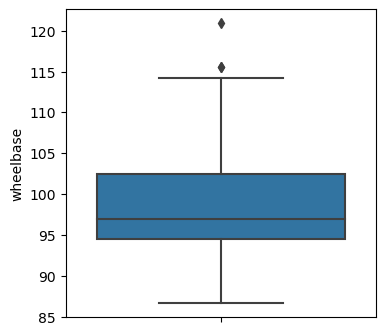

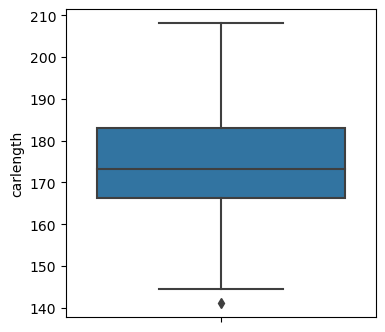

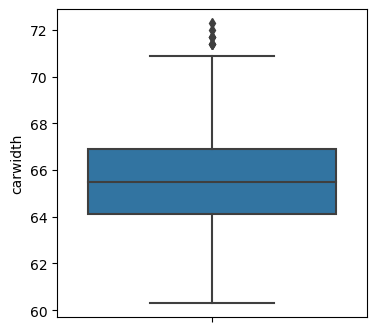

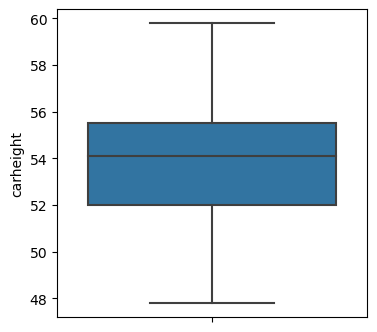

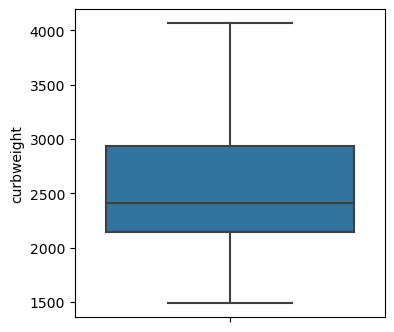

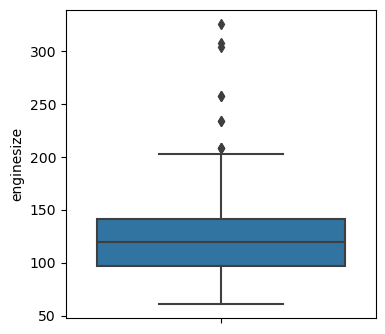

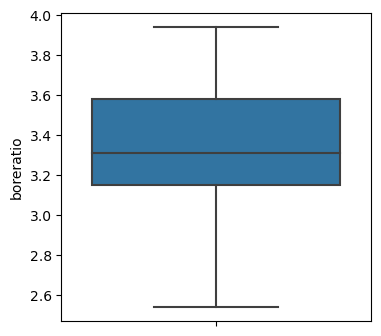

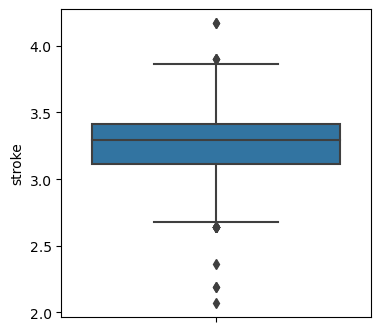

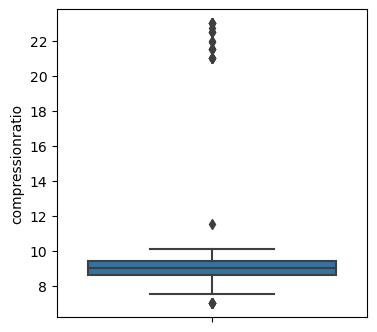

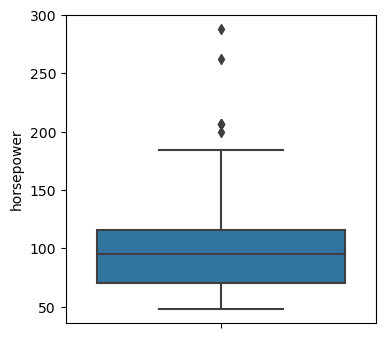

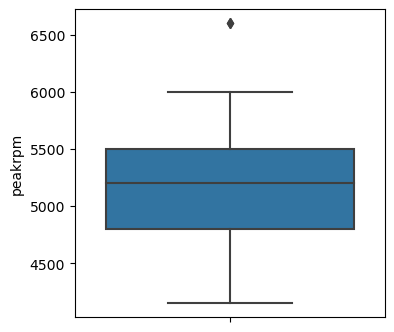

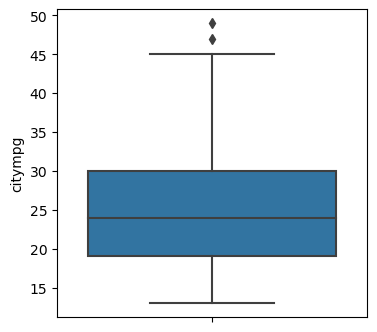

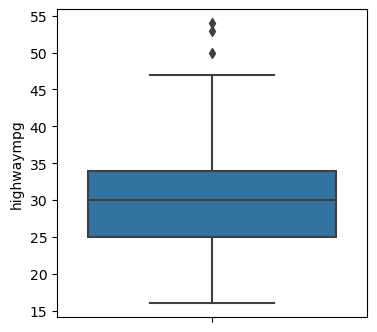

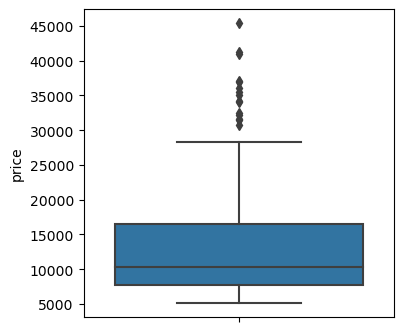

In [10]:
for i in column:
        plt.figure(figsize=(4,4))
        sns.boxplot( data =df , y =i)
        plt.show()

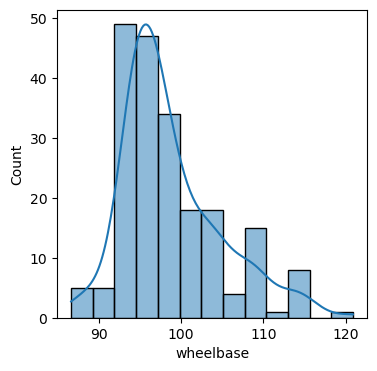

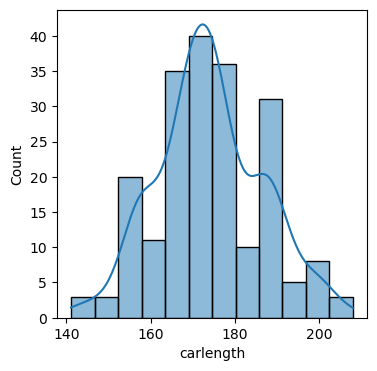

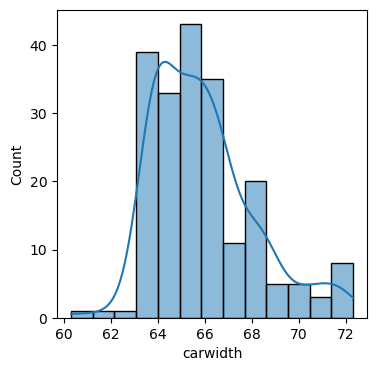

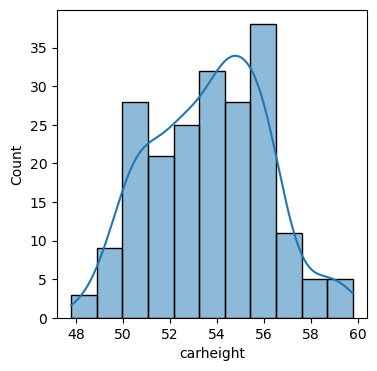

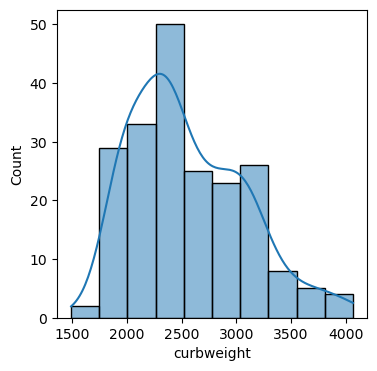

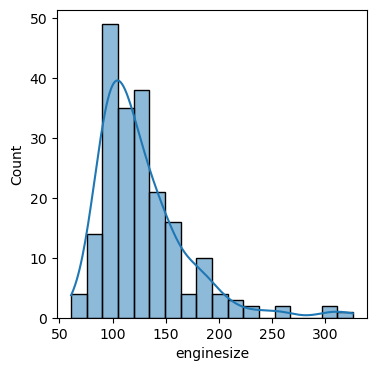

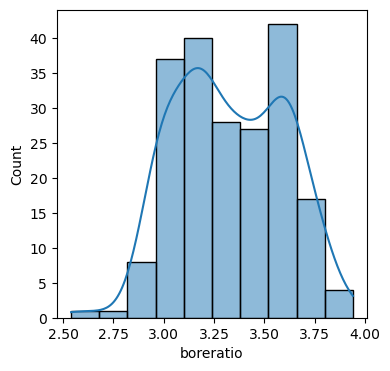

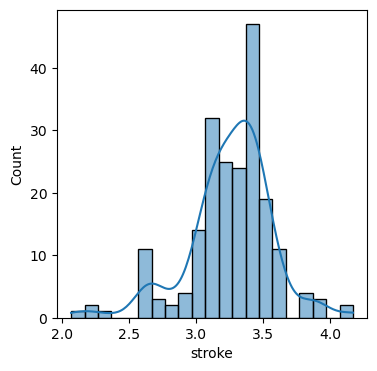

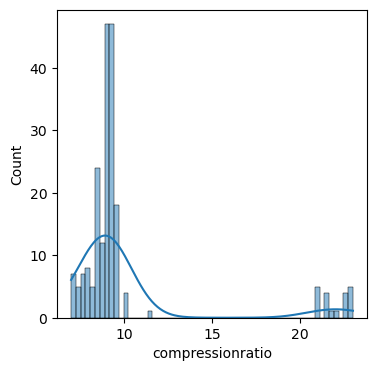

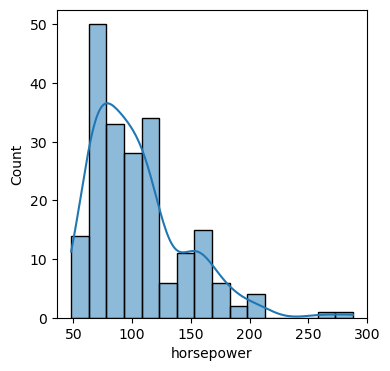

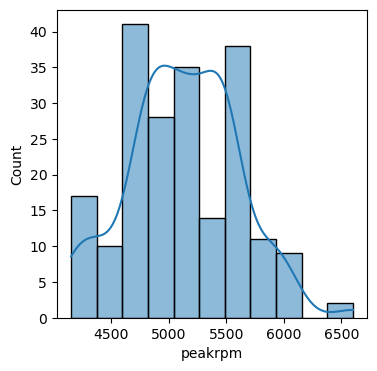

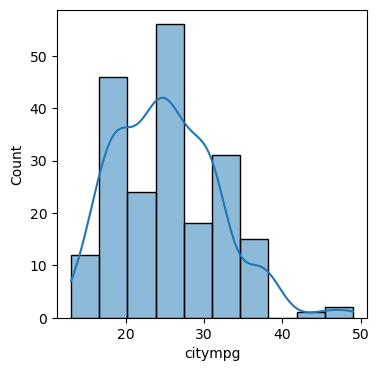

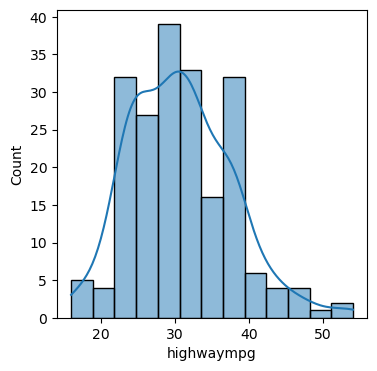

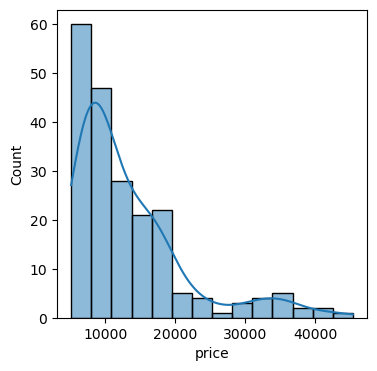

In [11]:
for i in column:
    plt.figure(figsize=(4,4))
    sns.histplot( data =df , x =i, kde = True)
    plt.show()

### Label encoding categorical columns

In [12]:
le = LabelEncoder()

In [13]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = le.fit_transform(df[i])

In [14]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,5,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


Feature selection is performed using Pearson’s Correlation Coefficient via the
f_regression() function.

#### OUtlier Treatment

In [15]:
def outlier_limit(col):
    Q3,Q1 = np.nanpercentile(col,[75,25])
    IQR = Q3- Q1
    UL =Q3+ 1.5*IQR
    LL =Q1 -1.5*IQR
    return UL,LL

In [16]:
UL,LL = outlier_limit(df.price)
df['price'] = np.where((df.price>UL)|(df.price<LL),np.nan,df.price)

In [17]:
df.isnull().sum()

symboling            0
CarName              0
fueltype             0
aspiration           0
doornumber           0
carbody              0
drivewheel           0
enginelocation       0
wheelbase            0
carlength            0
carwidth             0
carheight            0
curbweight           0
enginetype           0
cylindernumber       0
enginesize           0
fuelsystem           0
boreratio            0
stroke               0
compressionratio     0
horsepower           0
peakrpm              0
citympg              0
highwaympg           0
price               15
dtype: int64

In [18]:
df.dropna(inplace=True)

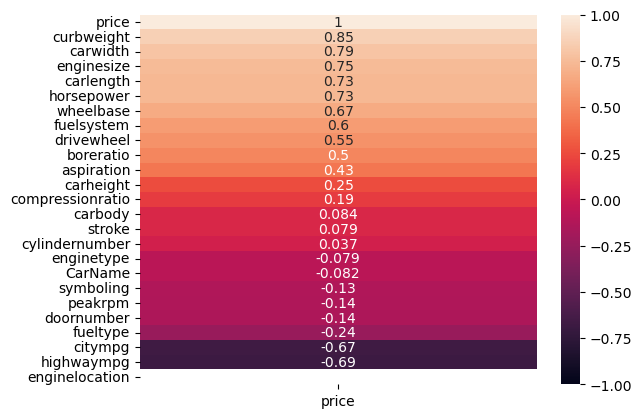

In [19]:
sns.heatmap(df.corr()[['price']].sort_values(by ='price',ascending= False),\
            vmin =-1,vmax =1,annot =True)
plt.show()

#### Selecting the features and targets

In [20]:
x = df.iloc[:,:-1].values
y =df.iloc[:,-1].values

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,\
                                                 random_state=42,shuffle=True)

In [22]:
fs = SelectKBest(score_func= f_regression , k = 'all')

In [23]:
fs.fit(x_train,y_train)

SelectKBest(k='all', score_func=<function f_regression at 0x000001614218C4C0>)

#### Checking the scores for the features

In [24]:
for i in range(len(fs.scores_)):
    print(f'feature is {i} and score is {fs.scores_[i]}')

feature is 0 and score is 2.03239079809569
feature is 1 and score is 3.0631772957757812
feature is 2 and score is 8.863122574367127
feature is 3 and score is 36.20061091990855
feature is 4 and score is 2.0180628263206954
feature is 5 and score is 0.5879688163290764
feature is 6 and score is 64.52169798047709
feature is 7 and score is nan
feature is 8 and score is 104.09405595437595
feature is 9 and score is 143.85345893928675
feature is 10 and score is 221.12232316167842
feature is 11 and score is 9.113969214847883
feature is 12 and score is 356.3809429608188
feature is 13 and score is 0.36096782721778625
feature is 14 and score is 0.2004981090695169
feature is 15 and score is 167.67106869731103
feature is 16 and score is 69.48265699968613
feature is 17 and score is 47.60341155984421
feature is 18 and score is 0.14274941748494124
feature is 19 and score is 5.658799371175684
feature is 20 and score is 142.98494875698321
feature is 21 and score is 2.2862240099209603
feature is 22 and sco

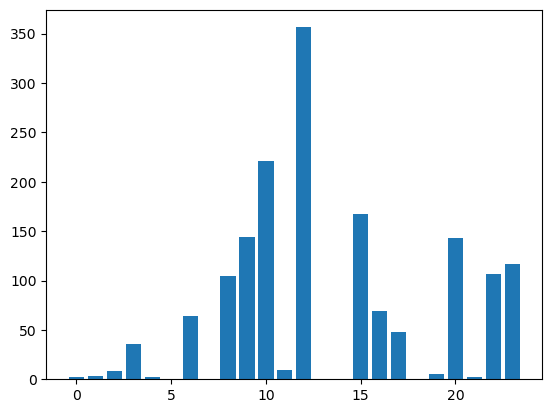

In [25]:
plt.bar([i for i in range(len(fs.scores_))],fs.scores_)
plt.show()

#### The plot clearly shows 6 features are a lot more important than the other features.
#### We could set k=6 When configuring the SelectKBest to select these top features.

In [26]:
fs = SelectKBest(score_func= f_regression , k =6)

In [27]:
fs.fit(x_train,y_train)

SelectKBest(k=6, score_func=<function f_regression at 0x000001614218C4C0>)

In [28]:
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

In [29]:
x_test_fs.shape

(38, 6)

### Model selection

In [30]:
models ={
    'LinearRegression' : LinearRegression(),
    'Ridge' :Ridge(),
    'Lasso' : Lasso(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(random_state=0),
    'AdaBoostRegressor' : AdaBoostRegressor(),
    'GradientBoostingRegressor' : GradientBoostingRegressor(),
    'LinearSVR': LinearSVR()
    
}

In [31]:
for name,model in models.items():
    scores = cross_val_score(model,x,y,scoring='neg_mean_squared_error',cv =10,n_jobs=4)
    print(f'Cross validation score of {name}')
    rmse =np.sqrt(-scores)
    rmse_avg = np.mean(rmse)
    print('avg rmse is :',rmse_avg)
    print('*'*100)
    

Cross validation score of LinearRegression
avg rmse is : 3102.9038712682814
****************************************************************************************************
Cross validation score of Ridge
avg rmse is : 3123.261208521459
****************************************************************************************************
Cross validation score of Lasso
avg rmse is : 3110.405798624267
****************************************************************************************************
Cross validation score of DecisionTreeRegressor
avg rmse is : 3368.7670988350847
****************************************************************************************************
Cross validation score of RandomForestRegressor
avg rmse is : 2590.584279156439
****************************************************************************************************
Cross validation score of AdaBoostRegressor
avg rmse is : 2658.1208805085457
*****************************************************